In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tqdm.notebook as tqdm
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import optim
import torch.nn as nn
from torchvision import datasets
import pip
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, cohen_kappa_score
import copy
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_confusion_matrix
from IPython.display import SVG, display, clear_output

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*IMAGE TRANSFORMATIONS*

In [ ]:
normalize_mean = [0.485,0.456,0.406]
normalize_std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.ToTensor(),
  transforms.RandomHorizontalFlip(), 
  transforms.RandomRotation(5),
  transforms.CenterCrop((222,222)),
  transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
  transforms.Normalize(normalize_mean, normalize_std)
])

In [ ]:
transform_original = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.ToTensor()
])

In [ ]:
!mkdir -p /my_data/

In [ ]:
!unzip '/content/drive/MyDrive/COVID_DETECTION/Pneumonia.zip' -d "/my_data"

Archive:  /content/drive/MyDrive/COVID_DETECTION/Pneumonia.zip
   creating: /my_data/Viral Pneumonia/
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (10).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (100).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1000).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1001).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1002).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1003).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1004).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1005).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1006).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1007).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1008).png  
 extracting: /my_data/Viral Pneumonia/Viral Pneumonia (1009).png  
 extracting: /my_data/Viral Pneum

In [ ]:
!unzip '/content/drive/MyDrive/COVID_DETECTION/COVID.zip' -d "/my_data"

Archive:  /content/drive/MyDrive/COVID_DETECTION/COVID.zip
   creating: /my_data/COVID/
   creating: /my_data/COVID/COVID/
 extracting: /my_data/COVID/COVID (1).png  
 extracting: /my_data/COVID/COVID (10).png  
 extracting: /my_data/COVID/COVID (100).png  
 extracting: /my_data/COVID/COVID (1000).png  
 extracting: /my_data/COVID/COVID (1001).png  
 extracting: /my_data/COVID/COVID (1002).png  
 extracting: /my_data/COVID/COVID (1003).png  
 extracting: /my_data/COVID/COVID (1004).png  
 extracting: /my_data/COVID/COVID (1005).png  
 extracting: /my_data/COVID/COVID (1006).png  
 extracting: /my_data/COVID/COVID (1007).png  
 extracting: /my_data/COVID/COVID (1008).png  
 extracting: /my_data/COVID/COVID (1009).png  
 extracting: /my_data/COVID/COVID (101).png  
 extracting: /my_data/COVID/COVID (1010).png  
 extracting: /my_data/COVID/COVID (1011).png  
 extracting: /my_data/COVID/COVID (1012).png  
 extracting: /my_data/COVID/COVID (1013).png  
 extracting: /my_data/COVID/COVID (101

In [ ]:
!unzip '/content/drive/MyDrive/COVID_DETECTION/NORMAL.zip' -d "/my_data"

Archive:  /content/drive/MyDrive/COVID_DETECTION/NORMAL.zip
   creating: /my_data/NORMAL/
 extracting: /my_data/NORMAL/NORMAL (1).png  
 extracting: /my_data/NORMAL/NORMAL (10).png  
 extracting: /my_data/NORMAL/NORMAL (100).png  
 extracting: /my_data/NORMAL/NORMAL (1000).png  
 extracting: /my_data/NORMAL/NORMAL (1001).png  
 extracting: /my_data/NORMAL/NORMAL (1002).png  
 extracting: /my_data/NORMAL/NORMAL (1003).png  
 extracting: /my_data/NORMAL/NORMAL (1004).png  
 extracting: /my_data/NORMAL/NORMAL (1005).png  
 extracting: /my_data/NORMAL/NORMAL (1006).png  
 extracting: /my_data/NORMAL/NORMAL (1007).png  
 extracting: /my_data/NORMAL/NORMAL (1008).png  
 extracting: /my_data/NORMAL/NORMAL (1009).png  
 extracting: /my_data/NORMAL/NORMAL (101).png  
 extracting: /my_data/NORMAL/NORMAL (1010).png  
 extracting: /my_data/NORMAL/NORMAL (1011).png  
 extracting: /my_data/NORMAL/NORMAL (1012).png  
 extracting: /my_data/NORMAL/NORMAL (1013).png  
 extracting: /my_data/NORMAL/NORMAL

*PREPARAMOS DATASET

In [ ]:
def myloader(filename):
    return Image.open(filename).convert('RGB')

In [ ]:
dataset = datasets.ImageFolder('/my_data', transform=transform)

In [ ]:
dataset_sin_data_augmentation = datasets.ImageFolder('/my_data', transform= transform_original)

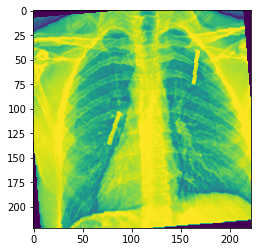

In [ ]:
x, _ = dataset[1030] # x is now a torch.Tensor
plt.imshow(x.numpy()[0])


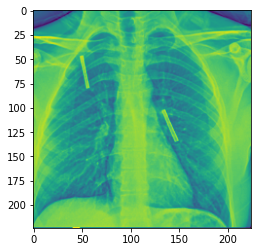

In [ ]:
x, _ = dataset_sin_data_augmentation[1030] # x is now a torch.Tensor
plt.imshow(x.numpy()[0])

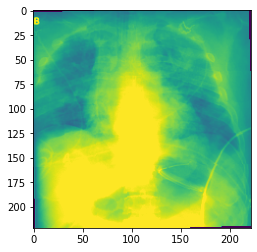

In [ ]:
x, _ = dataset[100] # x is now a torch.Tensor
plt.imshow(x.numpy()[0])


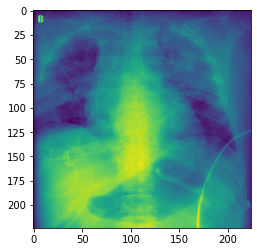

In [ ]:
x, _ = dataset_sin_data_augmentation[100] # x is now a torch.Tensor
plt.imshow(x.numpy()[0])

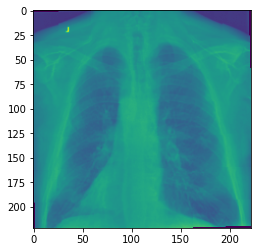

In [ ]:
x, _ = dataset[11] # x is now a torch.Tensor
plt.imshow(x.numpy()[0])

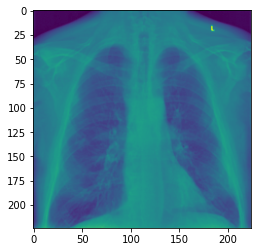

In [ ]:
x, _ = dataset_sin_data_augmentation[11] # x is now a torch.Tensor
plt.imshow(x.numpy()[0])

In [ ]:
print(dataset.class_to_idx) #Clases asignadas en la función imagefolder a las tres carpetas

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


In [ ]:
dataset

Dataset ImageFolder
    Number of datapoints: 5080
    Root location: /my_data
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[-0.2, 0.2])
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
len(dataset)

5080

DIVIDIMOS DATASET EN TRAIN, VALIDACIÓN Y TEST

In [ ]:
n_train = int(0.7*len(dataset))
n_valid_test = (len(dataset)-n_train)
n_valid = int((0.5*(n_valid_test)))
n_test = int((0.5*(n_valid_test)))

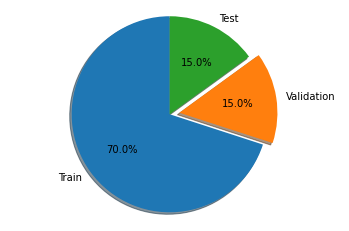

In [ ]:
import matplotlib.pyplot as plt


labels = 'Train', 'Validation', 'Test'
sizes = [n_train, n_valid, n_test]
explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [ ]:
train_ds, val_ds, test_ds = torch.utils.data.random_split(dataset, [n_train, n_valid, n_test])

PREPARAMOS DATALOADER

In [ ]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle = True)

In [ ]:
dataloaders_entrenamiento = {"Train":train_loader, "Validation":val_loader}
data_sizes = {x: len(dataloaders_entrenamiento[x].sampler) for x in ['Train','Validation']}

VISUALIZACIÓN DE LOS DATOS

COVID IMAGE:

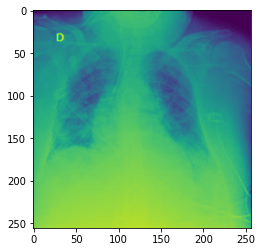

In [ ]:
image = plt.imread('/my_data/COVID/COVID (100).png')
plt.imshow(image)

NORMAL IMAGE:

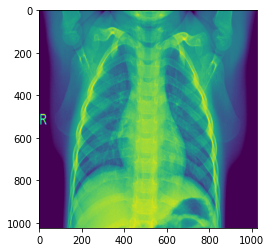

In [ ]:
image = plt.imread('/my_data/NORMAL/NORMAL (1009).png')
plt.imshow(image)

VIRAL PNEUMONIA IMAGE

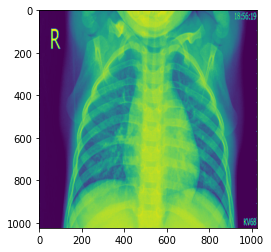

In [ ]:
image = plt.imread('/my_data/Viral Pneumonia/Viral Pneumonia (1030).png')
plt.imshow(image)

In [ ]:
dataset.classes

['COVID', 'NORMAL', 'Viral Pneumonia']

In [ ]:
dataset.class_to_idx

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}

**DENSENET**


In [ ]:
mobilenet_v2 = torchvision.models.mobilenet_v2(pretrained = True)
print(mobilenet_v2)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth



MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=T

In [ ]:
mobilenet_v2.classifier[1] =nn.Sequential( 
               nn.Linear(1280,3))
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mobilenet_v2.parameters(), lr = 0.05, momentum= 0.9)

DEFINIMOS LA GRÁFICA DE ENTRENAMIENTO

In [ ]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(acc_tr, acc_val, loss_tr, loss_val,
                          figsize=(12,6)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(acc_tr)),  100*np.array(acc_tr))
    plt.plot(1+np.arange(len(acc_val)), 100*np.array(acc_val))
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(acc_tr)), np.array(loss_tr))
    plt.plot(1+np.arange(len(acc_val)), np.array(loss_val))
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

ENTRENAMOS EL MODELO

In [ ]:
def train_covid(mobilenet_v2, loss_fn, optimizer, epochs=20):
    loss_tr = []
    acc_tr  = []
    loss_val = []
    acc_val = []
    since = time.time()
    best_loss = np.inf
    best_model_wts = copy.deepcopy(mobilenet_v2.state_dict())

    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch+1, epochs))
        print('-' * 20)

        # Cada epoch tendrá una fase de train y otra de validación
        for phase in ['Train', 'Validation']:
            if phase == 'Train':
                mobilenet_v2.train()  # Train
            else:
                mobilenet_v2.eval()   # Validación

            current_loss = 0.0
            current_acc = 0
            

            #Cogemos los inputs y los almacenamos en un dataloader filtrado por Train y Validation, para poder entrenarlos simultáneamente
            for inputs, labels in tqdm.tqdm(dataloaders_entrenamiento[phase], desc=phase, leave=False):

                #Hacemos 0 los parámetros del gradiente.
                optimizer.zero_grad()

                # BACKWARD PROPAGATION. Se calculan gradientes y se actualizan los pesos
                #Solo se hace el back propagation y se optimiza si es en Train
                with torch.set_grad_enabled(phase == 'Train'):
                    outputs = mobilenet_v2(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = loss_fn(outputs, labels)

                    # Solo hacemos el backward y optimizamos en train
                    if phase == 'Train':
                        loss.backward()
                        optimizer.step()

                 # Acumulamos las estadísticas de loss y accuracy en variables
                current_loss += loss.item() * inputs.size(0)
                current_acc += torch.sum(preds == labels.data)
            epoch_loss = current_loss / data_sizes[phase]
            epoch_acc = current_acc.double() / data_sizes[phase]
            if phase == 'Validation':
                print('{} Loss: {:.4f} | {} Accuracy: {:.4f}'.format(
                    phase, epoch_loss, phase, epoch_acc))
                loss_val.append(epoch_loss)
                acc_val.append(epoch_acc)
            else:
                print('{} Loss: {:.4f} | {} Accuracy: {:.4f}'.format(
                    phase, epoch_loss, phase, epoch_acc))
                loss_tr.append(epoch_loss)
                acc_tr.append(epoch_acc)
               

            
            if phase == 'Validation' and epoch_loss < best_loss:
                print('Validation loss decreased from {:.4f} to {:.4f} \nSaving Weights... '.format(best_loss, epoch_loss))
                best_loss = epoch_loss 
                best_model_wts = copy.deepcopy(mobilenet_v2.state_dict())

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val loss: {:.4f}'.format(best_loss))

    
    grafica_entrenamiento(acc_tr, acc_val, loss_tr, loss_val)
    return mobilenet_v2

Epoch 1/20
--------------------


Train Loss: 1.2438 | Train Accuracy: 0.6496


Validation Loss: 11.5403 | Validation Accuracy: 0.4488
Validation loss decreased from inf to 11.5403 
Saving Weights... 

Epoch 2/20
--------------------


Train Loss: 0.3952 | Train Accuracy: 0.8380


Validation Loss: 0.6604 | Validation Accuracy: 0.7612
Validation loss decreased from 11.5403 to 0.6604 
Saving Weights... 

Epoch 3/20
--------------------


Train Loss: 0.2604 | Train Accuracy: 0.8999


Validation Loss: 0.5517 | Validation Accuracy: 0.8438
Validation loss decreased from 0.6604 to 0.5517 
Saving Weights... 

Epoch 4/20
--------------------


Train Loss: 0.2017 | Train Accuracy: 0.9221


Validation Loss: 0.3157 | Validation Accuracy: 0.8727
Validation loss decreased from 0.5517 to 0.3157 
Saving Weights... 

Epoch 5/20
--------------------


Train Loss: 0.1734 | Train Accuracy: 0.9384


Validation Loss: 0.2642 | Validation Accuracy: 0.8871
Validation loss decreased from 0.3157 to 0.2642 
Saving Weights... 

Epoch 6/20
--------------------


Train Loss: 0.1426 | Train Accuracy: 0.9452


Validation Loss: 0.2322 | Validation Accuracy: 0.9160
Validation loss decreased from 0.2642 to 0.2322 
Saving Weights... 

Epoch 7/20
--------------------


Train Loss: 0.1203 | Train Accuracy: 0.9615


Validation Loss: 0.2221 | Validation Accuracy: 0.9239
Validation loss decreased from 0.2322 to 0.2221 
Saving Weights... 

Epoch 8/20
--------------------


Train Loss: 0.1199 | Train Accuracy: 0.9550


Validation Loss: 0.1219 | Validation Accuracy: 0.9541
Validation loss decreased from 0.2221 to 0.1219 
Saving Weights... 

Epoch 9/20
--------------------


Train Loss: 0.1105 | Train Accuracy: 0.9598


Validation Loss: 0.1728 | Validation Accuracy: 0.9423

Epoch 10/20
--------------------


Train Loss: 0.1041 | Train Accuracy: 0.9629


Validation Loss: 0.1173 | Validation Accuracy: 0.9633
Validation loss decreased from 0.1219 to 0.1173 
Saving Weights... 

Epoch 11/20
--------------------


Train Loss: 0.0988 | Train Accuracy: 0.9632


Validation Loss: 0.1384 | Validation Accuracy: 0.9462

Epoch 12/20
--------------------


Train Loss: 0.0782 | Train Accuracy: 0.9702


Validation Loss: 0.1253 | Validation Accuracy: 0.9619

Epoch 13/20
--------------------


Train Loss: 0.0958 | Train Accuracy: 0.9646


Validation Loss: 0.1566 | Validation Accuracy: 0.9488

Epoch 14/20
--------------------


Train Loss: 0.0996 | Train Accuracy: 0.9646


Validation Loss: 0.1446 | Validation Accuracy: 0.9528

Epoch 15/20
--------------------


Train Loss: 0.0727 | Train Accuracy: 0.9730


Validation Loss: 0.1230 | Validation Accuracy: 0.9541

Epoch 16/20
--------------------


Train Loss: 0.0652 | Train Accuracy: 0.9761


Validation Loss: 0.1491 | Validation Accuracy: 0.9501

Epoch 17/20
--------------------


Train Loss: 0.0543 | Train Accuracy: 0.9783


Validation Loss: 0.0997 | Validation Accuracy: 0.9659
Validation loss decreased from 0.1173 to 0.0997 
Saving Weights... 

Epoch 18/20
--------------------


Train Loss: 0.0512 | Train Accuracy: 0.9834


Validation Loss: 0.0944 | Validation Accuracy: 0.9724
Validation loss decreased from 0.0997 to 0.0944 
Saving Weights... 

Epoch 19/20
--------------------


Train Loss: 0.0438 | Train Accuracy: 0.9834


Validation Loss: 0.1256 | Validation Accuracy: 0.9541

Epoch 20/20
--------------------


Train Loss: 0.0466 | Train Accuracy: 0.9831


Validation Loss: 0.1555 | Validation Accuracy: 0.9541

Training complete in 140m 22s
Best val loss: 0.0944


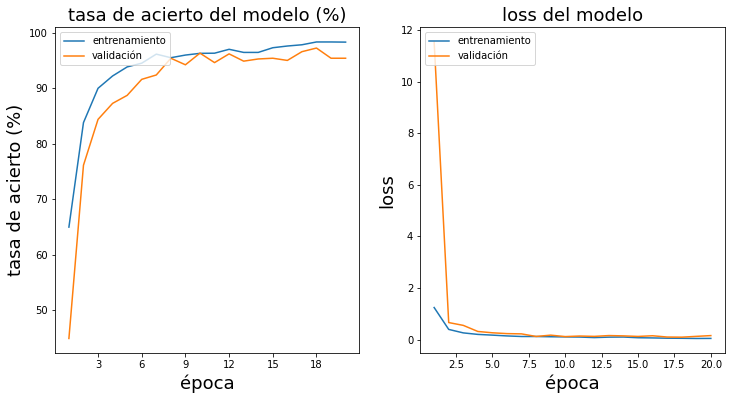

In [ ]:
base_model = train_covid(mobilenet_v2, loss_fn, optimizer, epochs=20)

RESULTADOS OBTENIDOS

In [ ]:
mobilenet_v2.eval()
correct = 0
total = 0
y_pred = []
y_real = []
with torch.no_grad():
  for data in test_loader:
    #inputs para la evaluación
    images, labels = data
    outputs = mobilenet_v2(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    #Para calcular las correctas encuentra la suma cuando las etiquetas son iguales a las predecidas calculadas anteriormente
    correct += (predicted == labels).sum().item()
    y_pred.extend(predicted.numpy().tolist())
    y_real.extend(labels.numpy().tolist())
    #y_pred.extend(predicted.numpy().tolist())
#Dividimos correctas entre totales para calcular la precisión
  print('Accuracy of the network on the test images: %d %%' % (
      100 * correct / total))

Accuracy of the network on the test images: 96 %


(array([350.,   0.,   0.,   0.,   0., 208.,   0.,   0.,   0., 204.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

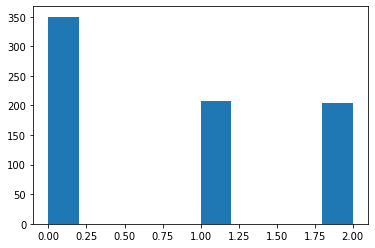

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_pred)


CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_pred, y_real))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       350
           1       0.91      0.98      0.94       208
           2       0.98      0.89      0.93       204

    accuracy                           0.96       762
   macro avg       0.96      0.95      0.95       762
weighted avg       0.96      0.96      0.96       762



In [ ]:
print(y_real)

[2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 

In [ ]:
print(y_pred)

[2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 

MATRIZ DE CONFUSIÓN

In [ ]:

conf_matrix= confusion_matrix(y_pred, y_real)

In [ ]:
dataset_indices=dataset.class_to_idx
import seaborn as sn

In [ ]:
print(dataset_indices)

{'COVID': 0, 'NORMAL': 1, 'Viral Pneumonia': 2}


In [ ]:
conf_matrix = pd.DataFrame(conf_matrix, columns=['COVID', 'NORMAL', 'PNEUMONIA'], index=dataset_indices)
conf_matrix


,COVID,NORMAL,PNEUMONIA
COVID,346,3,1
NORMAL,1,204,3
Viral Pneumonia,5,17,182


[Text(32.99999999999999, 0.5, 'True label'),
 Text(0.5, 15.0, 'Predicted label')]

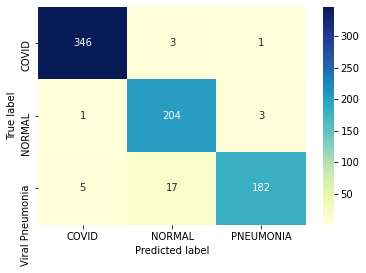

In [ ]:
conf_matrix2 = pd.DataFrame(conf_matrix, columns=['COVID', 'NORMAL', 'PNEUMONIA'], index=dataset_indices)
ax = sn.heatmap(conf_matrix2, annot=True, cmap='YlGnBu', fmt='g')
ax.set(xlabel='Predicted label', ylabel='True label')

VISUALIZACIÓN DE LAS PREDICCIONES

In [ ]:
class_names=dataset.classes
def show_images(images, labels, preds):
    plt.figure(figsize=(20,10))

    for i, image in enumerate(images): 
        plt.subplot(5,5,i+1, xticks=[], yticks=[])
        image=image.numpy().transpose((1,2,0))
        plt.imshow(image)
        col = 'green' if preds[i]==labels[i] else 'red'
        plt.xlabel(f'Actual : {class_names[int(labels[i].numpy())]}/ Predicted: {class_names[int(preds[i].numpy())]}', color=col)
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

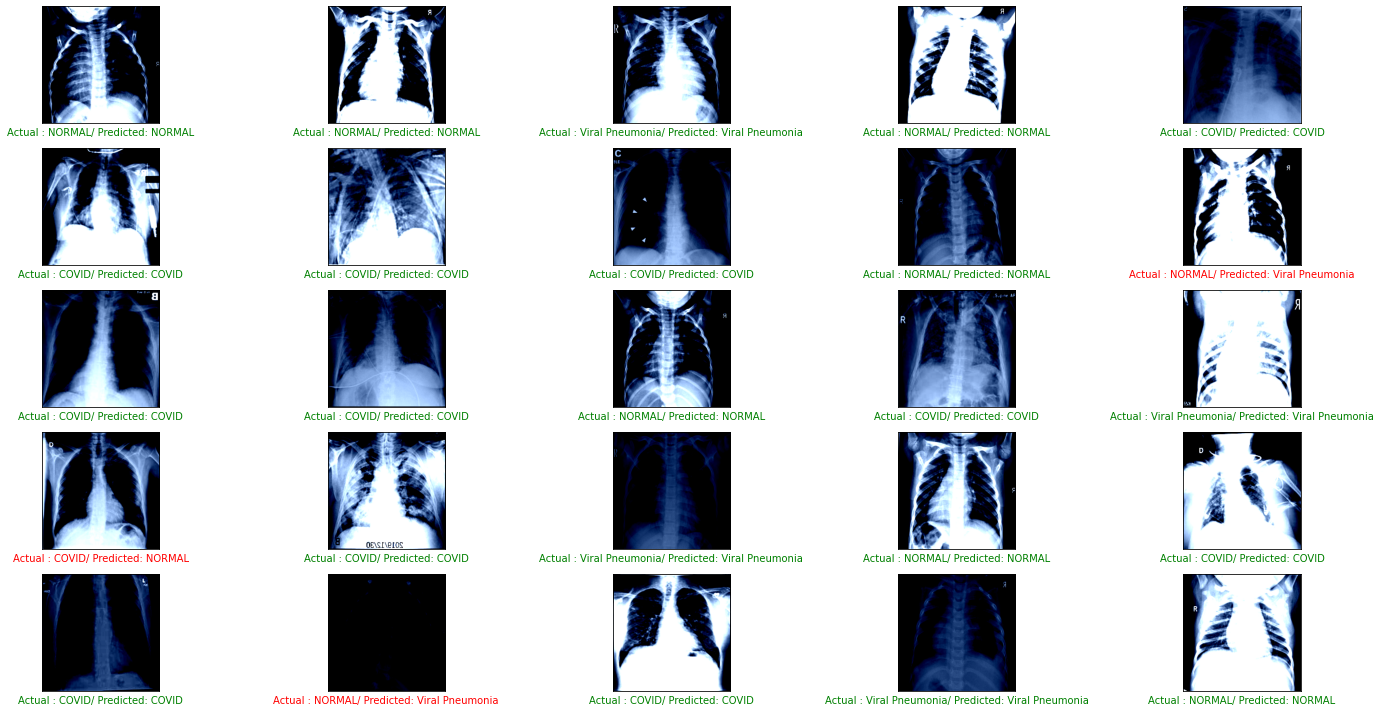

In [ ]:
def show_preds() :
  mobilenet_v2.eval()
  images, labels = next(iter(test_loader))
  outputs = mobilenet_v2(images)
  _, preds = torch.max(outputs, 1)
  show_images(images, labels, preds)
show_preds()